In [3]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p38/bin/python -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
pd.options.display.max_rows=20
pd.options.display.max_columns=10

In [5]:
data = pd.read_csv('../dataset/train.csv')

In [6]:
data.groupby('fraud').size()

fraud
0    3869
1     131
dtype: int64

In [7]:
data.groupby('fraud').sample(n=5)

,fraud,vehicle_claim,total_claim_amount,customer_age,months_as_customer,...,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Police,police_report_available_No,police_report_available_Yes
3475,0,4291.880789,50891.880789,22,38,...,0,0,1,1,0
3056,0,9178.003528,75578.003528,51,183,...,0,1,0,1,0
2931,0,13475.464425,17175.464425,44,198,...,0,0,1,0,1
1451,0,37716.109580,40316.109580,59,73,...,1,0,0,1,0
407,0,8086.384198,11886.384198,23,27,...,0,1,0,1,0
2235,1,8337.213616,29237.213616,26,2,...,0,1,0,1,0
669,1,11760.922190,45560.922190,49,19,...,0,0,1,1,0
1816,1,9515.041074,12015.041074,59,246,...,0,0,1,1,0
2035,1,6781.316120,34681.316120,44,151,...,0,0,1,1,0
3284,1,18608.263484,32408.263484,54,148,...,0,0,1,0,1


In [8]:
train = data.drop('fraud', axis=1)
label = pd.DataFrame(data['fraud'])

In [12]:
#test_prep_df = pd.read_csv('../dataset/test.csv')
#x_test = test_prep_df.drop('fraud', axis=1)

### Case 1

In [21]:
import xgboost as xgb
from xgboost import XGBClassifier

feature_data = xgb.DMatrix(train)

### Cross Validation

In [22]:
from sklearn.model_selection import cross_validate

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train, label, return_train_score=True, n_jobs=-1)

### Results

In [23]:
scores

{'fit_time': array([144.1417017 , 144.02712774, 144.38568997, 143.81462669,
        144.258672  ]),
 'score_time': array([0.04891634, 0.06468153, 0.00620198, 0.07874012, 0.03930736]),
 'test_score': array([0.9625 , 0.96875, 0.96625, 0.9625 , 0.96625]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [24]:
import numpy as np

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9652499999999999


### Case 2

In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(train, label, test_size=0.2, random_state=42)

### Hyperparameter 설정

In [10]:
max_depth = 3
eta = 0.2
objective = 'binary:logistic'
scale_pos_weight = 29
learning_rate=0.1
n_estimators=100

### Training

In [12]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster='gbtree', objective=objective, 
                   max_depth=max_depth, eta=eta, learning_rate=learning_rate, n_estimators=n_estimators, 
                   n_jobs=-1)

In [13]:
xgb.fit(train_input, train_target)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.2,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

### Test Dataset

In [14]:
test_input

,vehicle_claim,total_claim_amount,customer_age,months_as_customer,num_claims_past_year,...,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Police,police_report_available_No,police_report_available_Yes
555,20012.823606,35612.823606,21,25,0,...,0,0,1,1,0
3491,3901.726662,31501.726662,68,193,0,...,0,0,1,1,0
527,20383.128903,37183.128903,39,101,0,...,0,0,1,1,0
3925,7147.861234,22247.861234,36,60,1,...,0,0,1,0,1
2989,17782.003070,23582.003070,41,130,0,...,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1922,34628.232937,71728.232937,65,165,0,...,0,0,1,0,1
865,2330.177251,6530.177251,37,226,0,...,0,1,0,1,0
3943,18892.362826,88992.362826,62,152,0,...,0,0,0,1,0
1642,19908.068639,79508.068639,29,7,0,...,0,0,0,1,0


In [15]:
test_target

,fraud
555,0
3491,0
527,0
3925,0
2989,0
...,...
1922,0
865,0
3943,0
1642,1


### Results

In [16]:
y_pred = xgb.predict(test_input)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, test_target)
cm

array([[766,  34],
       [  0,   0]])

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_pred, y_pred = test_target))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       800
           1       0.00      0.00      0.00         0

    accuracy                           0.96       800
   macro avg       0.50      0.48      0.49       800
weighted avg       1.00      0.96      0.98       800



/home/ec2-user/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [19]:
print(xgb.score(train_input, train_target))
print(xgb.score(test_input, test_target))

0.9715625
0.9575


In [20]:
xgb.get_booster().feature_names = feature_data.feature_names
xgb.get_booster().feature_types = feature_data.feature_types

NameError: name 'feature_data' is not defined

In [21]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p38/bin/python -m pip install --upgrade pip' command.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

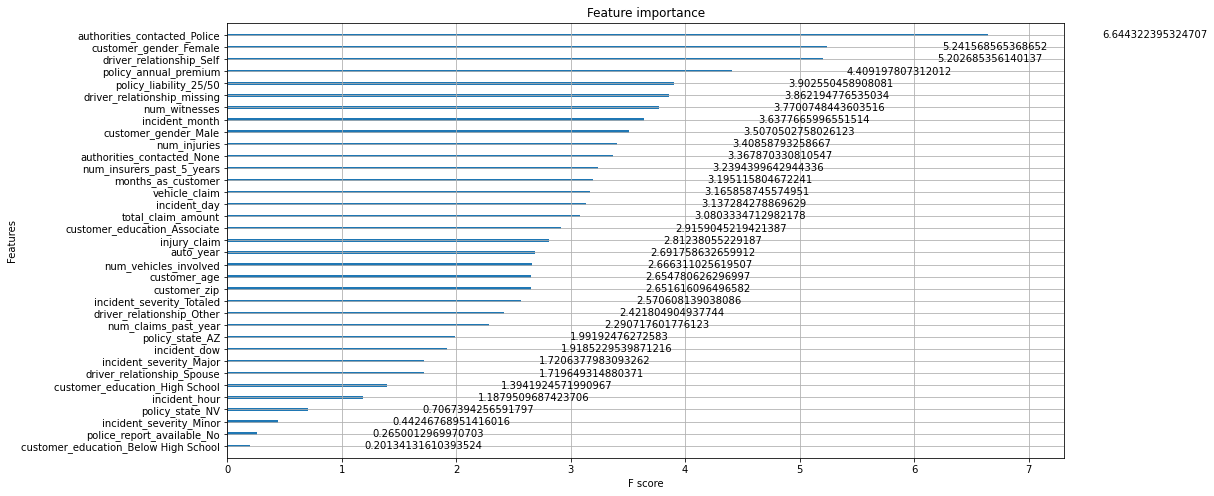

In [23]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(15, 8))
plot_importance(xgb, ax=ax, importance_type='gain')

In [8]:
model = xgb.XGBClassifier()
model.load_model("./xgboost-model-tf")

/home/ec2-user/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/xgboost/sklearn.py:741: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn(


In [9]:
model.get_booster().feature_names = feature_data.feature_names
model.get_booster().feature_types = feature_data.feature_types

In [ ]:
!pip install graphviz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

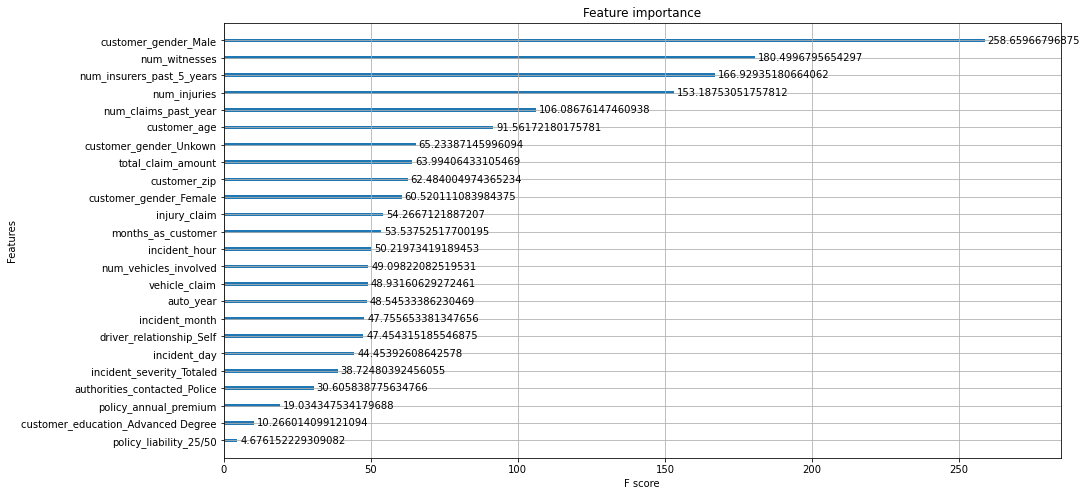

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
xgb.plot_importance(model, ax=ax, importance_type='gain')

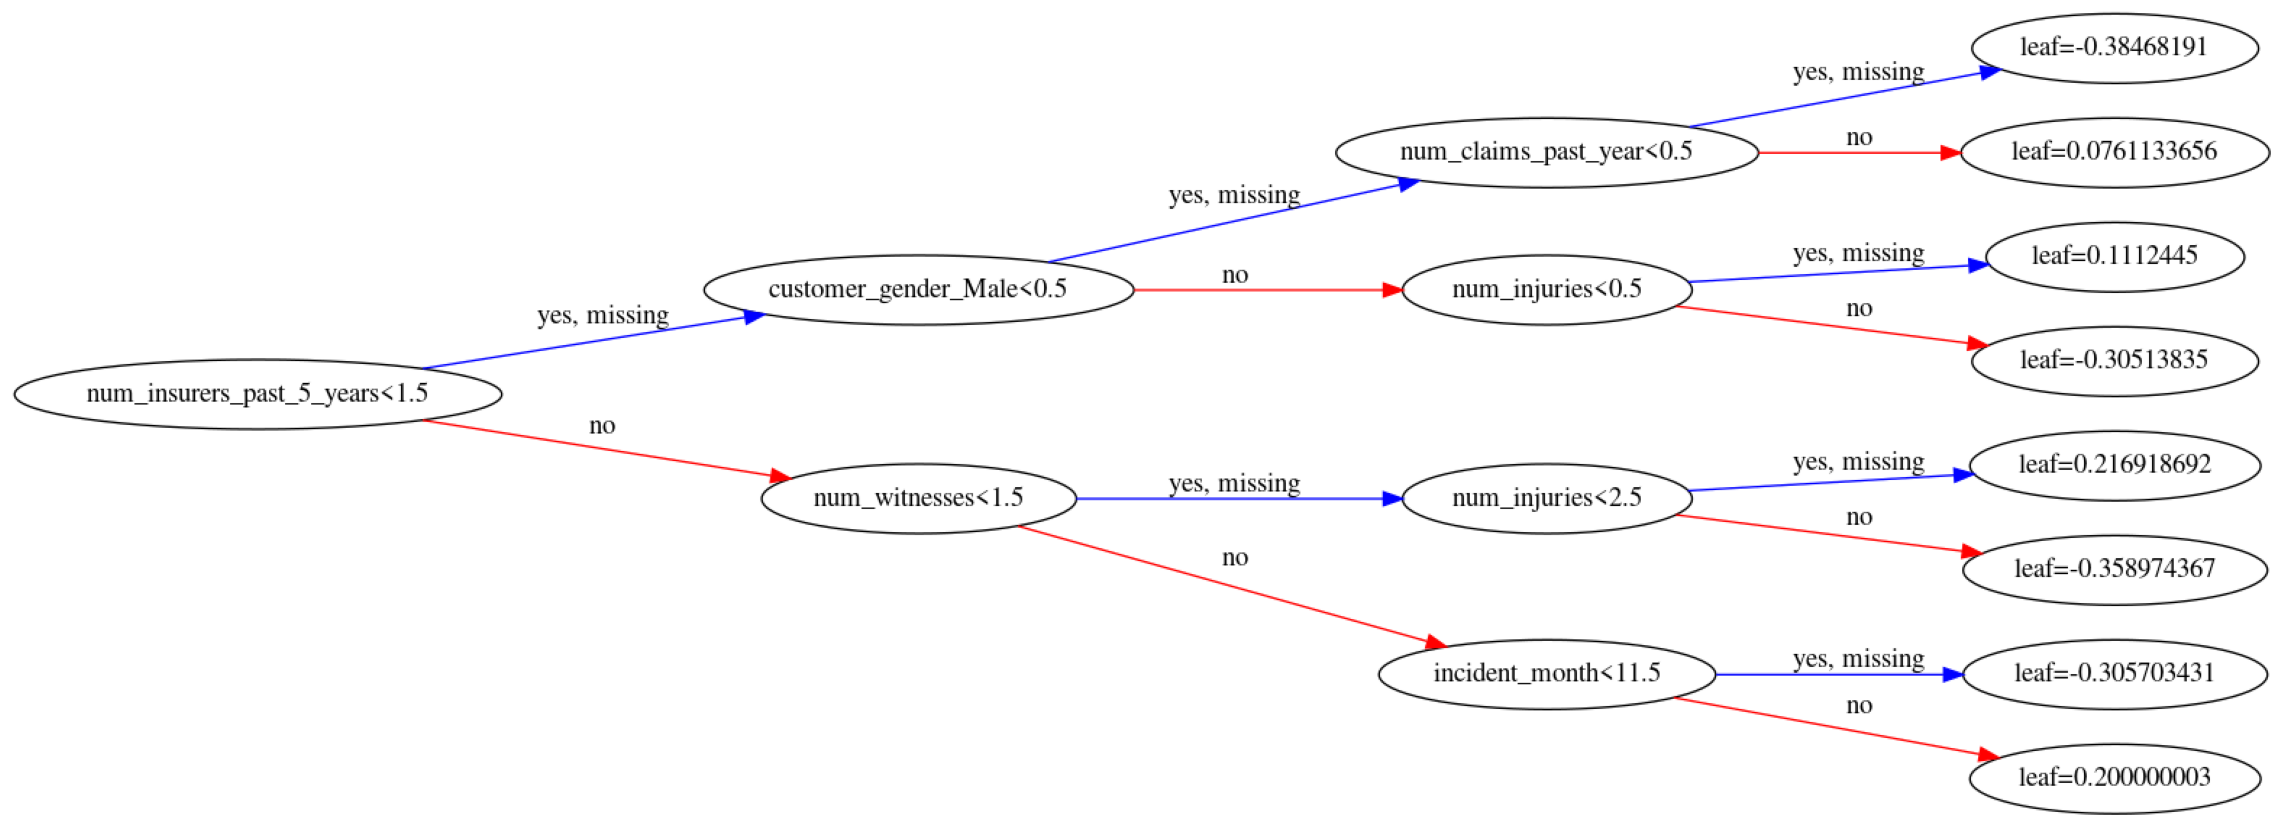

In [18]:
xgb.plot_tree(model, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(50, 15)
plt.show()